　砂防 2
 
# Hyperbolic equations

The best known equation model for the student of this department (Oceanology) is certainly the wave equation, which takes the format of:

$$
\frac{\partial{u}}{\partial{t}} = - a \frac{\partial{u}}{\partial{x}}      
$$

$$
for a \gt 0
$$

... which is a linear partial differential equation, with a constant speed a.

#### Numerical schemes

For this equation, there are several problems that we did not encounter during our first session with the parabolic equations. First of all, the FTFS and FTCS methods are both unconditionally unstable and create errors, so that these two are OUT:

-> NO FTFS
$$
\frac{u^{n+1}_i - u^{n}_{i}}{\Delta t} = -a \frac{u^{n}_{i+1} - u^{n}_{i}}{\Delta x}
$$

-> NO FTCS

$$
\frac{u^{n+1}_{i} - u^{n}_{i}}{\Delta t} = - a \frac{u^{n}_{i+1} - u^{n}_{i-1}}{2 \Delta x}
$$

On the contrary one of the method which is stable, is the first upwind differencing method. The Von Neumann stability analysis indicates that the method is stable when $ c \leq 1 $ and $ c = a \Delta t / \Delta x $, which is known as the Courant number or the Friedrichs Courant Number.

### The First Upwind Differencing Method (FUDM)

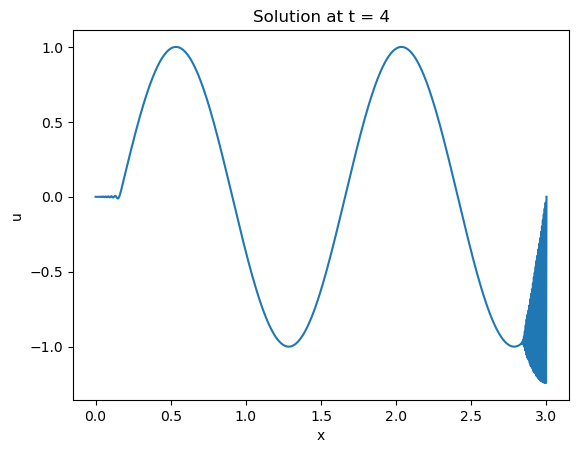

In [3]:
# First Upwind Differencing Method (FUDM)

import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 3.0  # Length of the domain
T = 4  # Total time
a = 0.02  # Wave speed

# Numerical parameters
nx = 1000  # Number of grid points
nt = 1000  # Number of time steps
dt = T / nt  # Time step size
dx = L / nx  # Grid spacing

# Initialize arrays
u = np.zeros((nt, nx))  # Solution array
x = np.linspace(0, L, nx)  # Grid points

# Initial condition
u[0, :] = np.sin(4 * np.pi * x / L)

# Euler's FTCS method
for n in range(1, nt):
    for i in range(1, nx - 1):
        u[n, i] = u[n-1, i] - a * dt / dx * (u[n-1, i+1] - u[n-1, i-1])

# Plotting
fig, ax = plt.subplots()
ax.plot(x, u[-1, :])
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_title('Solution at t = {}'.format(T))
plt.show()

#### Looking for a more stable scheme

### The LAX METHOD

The scheme above "works" but it is not very useful at the boundary and it tends to produce error quite easily, when the conditions of c are not met. Another scheme that works rather similarly but behaves better at the boundaries is the Lax method.

The lax method uses a scheme that is as follows:

$$
u^{n+1}_{i} = \frac{1}{2} (u^{n}_{i+1} + u^{n}_{i-1}) - \frac{a \Delta t}{2 \Delta x}(u^{n}_{i+1} - u^{n}_{i-1})
$$


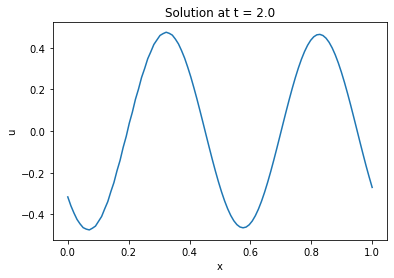

In [32]:
#LAX METHOD

import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0  # Length of the domain
T = 2.0  # Total time
c = 0.1  # Wave speed

# Numerical parameters
nx = 100  # Number of grid points
nt = 100  # Number of time steps
dt = T / nt  # Time step size
dx = L / nx  # Grid spacing

# Initialize arrays
u = np.zeros((nt, nx))  # Solution array
x = np.linspace(0, L, nx)  # Grid points

# Initial condition
u[0, :] = np.sin(4 * np.pi * x / L)

# Lax method with periodic boundary conditions
for n in range(1, nt):
    for i in range(nx):
        u[n, i] = 0.5 * (u[n-1, (i+1) % nx] + u[n-1, (i-1) % nx]) - 0.5 * c * dt / dx * (u[n-1, (i+1) % nx] - u[n-1, (i-1) % nx])

# Plotting
fig, ax = plt.subplots()
ax.plot(x, u[-1, :])
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_title('Solution at t = {}'.format(T))
plt.show()

#### The Lax-Wendroff method

Let's go back for a minute to the Taylor Series expansion of a differential equation:

$$
u(x, t+ \Delta t) = u(x,t) + \frac{\partial u}{\partial t} \Delta t + \frac{\partial^{2} u}{\partial t^{2}} \frac{(\Delta t)^2}{2!} + O(\Delta t)^{3}
$$

Now, keep in your mind this Tayler series and let's go back to our wave equation:


$$
\frac{\partial{u}}{\partial{t}} = - a \frac{\partial{u}}{\partial{x}}      
$$

Now, let's take the derivative of the time element in the equation above, and play a bit with it:

$$
\frac{\partial^2 u}{\partial t^2} = - a \frac{\partial}{\partial t} (\frac{\partial u}{\partial x}) = -a \frac{\partial}{\partial x}(\frac{\partial u}{\partial t}) = a^2 \frac {\partial^2 u}{\partial x^2}
$$

If we substitute those 2 equations in the taylor series, and write it in term of indices (for our grid), we get:

$$
u^{n+1}_i = u^n _i + (-a \frac{\partial u}{\partial x}) \Delta t + \frac{(\Delta t)^2}{2}(a^2 \frac{\partial^2 u}{\partial x^2})
$$

... which then leads to a formulation that we can use to solve the differential equation:

$$
u^{n+1}_i = u^n _i - a \Delta t [\frac{u^n _{i+1} - u^n _{i-1}}{2 \Delta x}]+ \frac{1}{2} a^2 (\Delta t)^2 [\frac{u^n _{i+1} - 2u^n _i + u^n _{i-1}}{(\Delta x)^2}]
$$

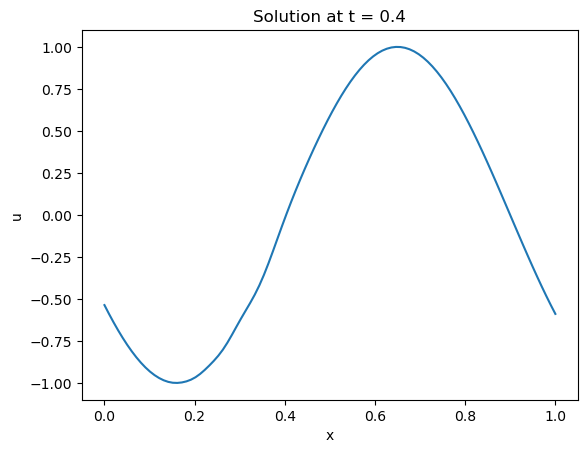

In [1]:
# to do with the class change the total time to > 1 then see instability, and then modify nt

import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0  # Length of the domain
T = 0.4  # Total time
a = 1  # Wave speed

# Numerical parameters
nx = 100  # Number of grid points
nt = 100  # Number of time steps
dt = T / nt  # Time step size
dx = L / nx  # Grid spacing

# Initialize arrays
u = np.zeros((nt, nx))  # Solution array
x = np.linspace(0, L, nx)  # Grid points

# Initial condition
u[0, :] = np.sin(2 * np.pi * x / L)

# Lax-Wendroff scheme
for n in range(1, nt):
    for i in range(1, nx - 1):
        u[n, i] = u[n-1, i] - 0.5 * a * dt / dx * (u[n-1, i+1] - u[n-1, i-1]) + 0.5 * (a * dt / dx) ** 2 * (u[n-1, i+1] - 2 * u[n-1, i] + u[n-1, i-1])

    # Apply periodic boundary conditions
    u[n, 0] = u[n, -2]
    u[n, -1] = u[n, 1]

# Plotting
fig, ax = plt.subplots()
ax.plot(x, u[-1, :])
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_title('Solution at t = {}'.format(T))
plt.show()